# Autoencoders

Autoencoders (AE) are a family of neural networks for which the output is the same as the intput. They work by compressing the input into a latent-space representation, and then reconstructing the output from this representation.

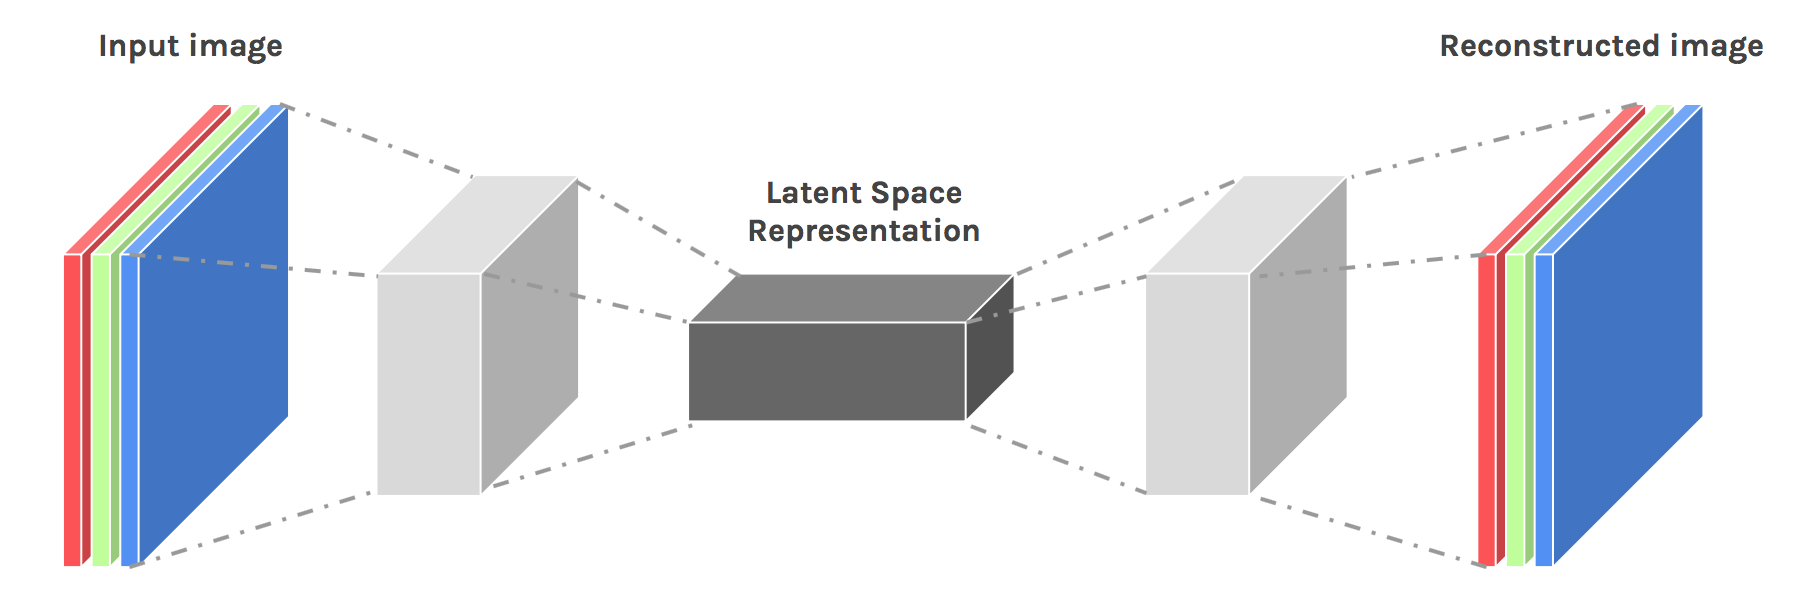

#### Let's build the simplest possible autoencoder

We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 120  # 120 floats -> compression of factor 25.6, assuming the input is 3072 floats

# this is our input placeholder
input_img = Input(shape=(3072,))

# Hidden Layer
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

#Final Layer
# "decoded" is the lossy reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Let's also create a separate encoder model:


In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

As well as the decoder model:

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


Now let's train our autoencoder to reconstruct Cifar10 images.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:



In [7]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

Let's prepare our input data. We're using cifar10 images, and we're discarding the labels (since we're only interested in encoding/decoding the input images).


In [8]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()


We will normalize all values between 0 and 1 and we will flatten the 32x32 images into vectors of size 3072.


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
#Now let's train our autoencoder for 100 epochs:

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=10000,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some pics
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s - loss: 0.6953 - val_loss: 0.6943
Epoch 2/100
50000/50000 [==============================] - 27s - loss: 0.6939 - val_loss: 0.6936
Epoch 3/100
50000/50000 [==============================] - 27s - loss: 0.6935 - val_loss: 0.6933
Epoch 4/100
50000/50000 [==============================] - 27s - loss: 0.6933 - val_loss: 0.6932
Epoch 5/100
50000/50000 [==============================] - 27s - loss: 0.6932 - val_loss: 0.6932
Epoch 6/100
50000/50000 [==============================] - 27s - loss: 0.6931 - val_loss: 0.6931
Epoch 7/100
50000/50000 [==============================] - 27s - loss: 0.6931 - val_loss: 0.6931
Epoch 8/100
50000/50000 [==============================] - 26s - loss: 0.6931 - val_loss: 0.6931
Epoch 9/100
50000/50000 [==============================] - 28s - loss: 0.6931 - val_loss: 0.6930
Epoch 10/100
50000/50000 [==============================] - 30s - loss: 0.693

50000/50000 [==============================] - 25s - loss: 0.6810 - val_loss: 0.6807
Epoch 85/100
50000/50000 [==============================] - 25s - loss: 0.6808 - val_loss: 0.6805
Epoch 86/100
50000/50000 [==============================] - 23s - loss: 0.6805 - val_loss: 0.6803
Epoch 87/100
50000/50000 [==============================] - 24s - loss: 0.6803 - val_loss: 0.6800
Epoch 88/100
50000/50000 [==============================] - 27s - loss: 0.6800 - val_loss: 0.6798
Epoch 89/100
50000/50000 [==============================] - 25s - loss: 0.6798 - val_loss: 0.6795
Epoch 90/100
50000/50000 [==============================] - 22s - loss: 0.6796 - val_loss: 0.6793
Epoch 91/100
50000/50000 [==============================] - 23s - loss: 0.6794 - val_loss: 0.6791
Epoch 92/100
50000/50000 [==============================] - 23s - loss: 0.6791 - val_loss: 0.6789
Epoch 93/100
50000/50000 [==============================] - 23s - loss: 0.6789 - val_loss: 0.6787
Epoch 94/100
50000/50000 [=======

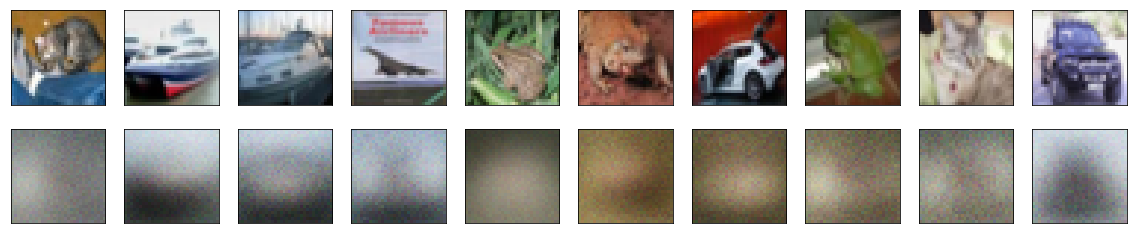

In [39]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Probably by changing the optimizer and reducing the number of training points we could get a better answer.

In [57]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [61]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 120
input_img = Input(shape=(3072,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [62]:
#Now let's train our autoencoder for 100 epochs:

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 4s - loss: 0.7263 - val_loss: 0.6804
Epoch 2/100
10000/10000 [==============================] - 5s - loss: 0.6761 - val_loss: 0.6810
Epoch 3/100
10000/10000 [==============================] - 4s - loss: 0.6716 - val_loss: 0.6724
Epoch 4/100
10000/10000 [==============================] - 5s - loss: 0.6671 - val_loss: 0.6676
Epoch 5/100
10000/10000 [==============================] - 4s - loss: 0.6639 - val_loss: 0.6629
Epoch 6/100
10000/10000 [==============================] - 5s - loss: 0.6600 - val_loss: 0.6590
Epoch 7/100
10000/10000 [==============================] - 4s - loss: 0.6576 - val_loss: 0.6583
Epoch 8/100
10000/10000 [==============================] - 4s - loss: 0.6546 - val_loss: 0.6555
Epoch 9/100
10000/10000 [==============================] - 5s - loss: 0.6531 - val_loss: 0.6524
Epoch 10/100
10000/10000 [==============================] - 4s - loss: 0.6506 - val_los

10000/10000 [==============================] - 5s - loss: 0.6166 - val_loss: 0.6189
Epoch 86/100
10000/10000 [==============================] - 5s - loss: 0.6167 - val_loss: 0.6192
Epoch 87/100
10000/10000 [==============================] - 5s - loss: 0.6179 - val_loss: 0.6216
Epoch 88/100
10000/10000 [==============================] - 5s - loss: 0.6175 - val_loss: 0.6186
Epoch 89/100
10000/10000 [==============================] - 4s - loss: 0.6164 - val_loss: 0.6186
Epoch 90/100
10000/10000 [==============================] - 4s - loss: 0.6159 - val_loss: 0.6180
Epoch 91/100
10000/10000 [==============================] - 5s - loss: 0.6165 - val_loss: 0.6196
Epoch 92/100
10000/10000 [==============================] - 4s - loss: 0.6160 - val_loss: 0.6177
Epoch 93/100
10000/10000 [==============================] - 4s - loss: 0.6156 - val_loss: 0.6181
Epoch 94/100
10000/10000 [==============================] - 5s - loss: 0.6155 - val_loss: 0.6174
Epoch 95/100
10000/10000 [=================

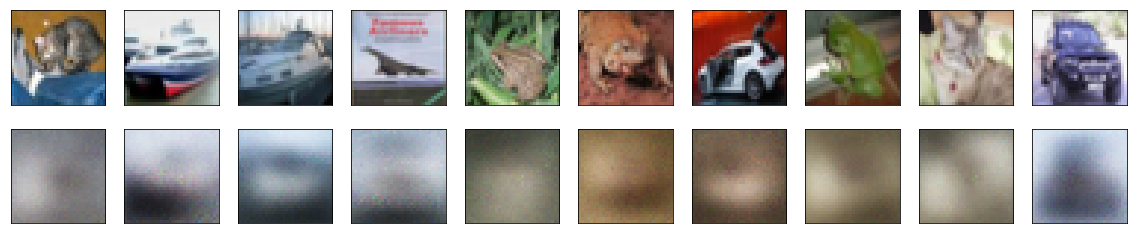

In [63]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

This is better than earlier with a test loss of 0.6179

### Regularized Autoencoders

##### Adding a sparsity constraint on the encoded representations

A sparse autoencoder is simply an autoencoder whose training criterion involves a sparsity penalty Ω(h) on the code layer h, in addition to the reconstruction error:

     L(x, g(f(x))) + Ω(h) 

where g(h) is the decoder output and typically we have h = f (x), the encoder output.

An autoencoder that has been regularized to be sparse must respond to unique statistical features of the dataset it has been trained on, rather than simply acting as an identity function. In this way, training to perform the copying task with a sparsity penalty can yield a model that has learned useful features as a byproduct.

In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [96]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [97]:
from keras import regularizers

encoding_dim = 120

input_img = Input(shape=(3072,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder_reg = Model(input_img, decoded)

# create the encoder model
encoder = Model(input_img, encoded)

# create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder_reg.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_reg.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_reg.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 5s - loss: 1.1919 - val_loss: 0.7071
Epoch 2/100
10000/10000 [==============================] - 4s - loss: 0.7046 - val_loss: 0.6996
Epoch 3/100
10000/10000 [==============================] - 4s - loss: 0.6994 - val_loss: 0.6971
Epoch 4/100
10000/10000 [==============================] - 5s - loss: 0.6972 - val_loss: 0.6959
Epoch 5/100
10000/10000 [==============================] - 5s - loss: 0.6960 - val_loss: 0.6951
Epoch 6/100
10000/10000 [==============================] - 4s - loss: 0.6952 - val_loss: 0.6946
Epoch 7/100
10000/10000 [==============================] - 4s - loss: 0.6947 - val_loss: 0.6943
Epoch 8/100
10000/10000 [==============================] - 5s - loss: 0.6943 - val_loss: 0.6940
Epoch 9/100
10000/10000 [==============================] - 4s - loss: 0.6940 - val_loss: 0.6938
Epoch 10/100
10000/10000 [==============================] - 4s - loss: 0.6938 - val_los

10000/10000 [==============================] - 4s - loss: 0.6926 - val_loss: 0.6928
Epoch 86/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 87/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 88/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 89/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 90/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 91/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 92/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 93/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 94/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 95/100
10000/10000 [=================

Let's train this model for 100 epochs (with the added regularization the model is less likely to overfit and can be trained longer). The models ends with a train loss of 0.69 and test loss of 0.69. The difference between the two is mostly due to the regularization term being added to the loss during training.

Here's a visualization of our new results:

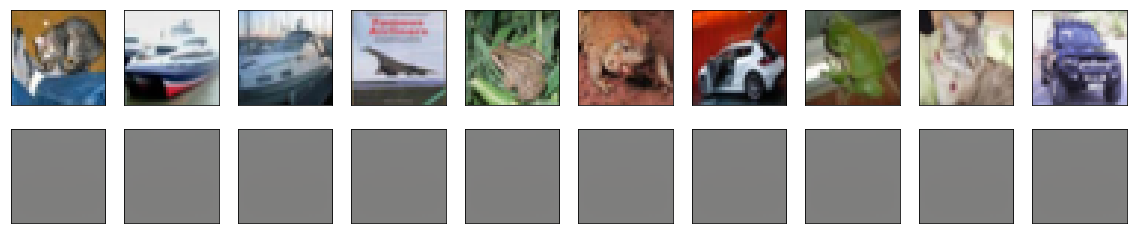

In [98]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

They look pretty similar to the previous model, the only significant difference being the sparsity of the encoded representations. 

### Deep autoencoder

Up until now we were using a single layer of encoder, in this case we will use a stack of layers:

In [75]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [89]:
input_img = Input(shape=(3072,))
encoded = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded)
encoded3 = Dense(250, activation='relu')(encoded2)

decoded3 = Dense(250, activation='relu')(encoded3)
decoded2 = Dense(500, activation='relu')(decoded3)
decoded = Dense(3072, activation='sigmoid')(decoded2)

Complie it

In [99]:
autoencoder_deep = Model(input_img, decoded)

# create the encoder model
encoder = Model(input_img, encoded3)

# create the decoder model
encoded_input = Input(shape=(1000,))
decoder_layer = autoencoder_deep.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

RuntimeError: Graph disconnected: cannot obtain value for tensor Tensor("input_33:0", shape=(?, 3072), dtype=float32) at layer "input_33". The following previous layers were accessed without issue: []

In [91]:
encoder = Model(input_img, encoded3)
encoded_input = Input(shape=(500,))
decoder_layer = autoencoder_deep.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: Error when checking : expected input_35 to have shape (None, 500) but got array with shape (5000, 250)

### Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [49]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [50]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format


ValueError: cannot reshape array of size 153600000 into shape (50000,28,28,1)

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

The model converges to a loss of 0.094, significantly better than our previous models (this is in large part due to the higher entropic capacity of the encoded representation, 128 dimensions vs. 32 previously). Let's take a look at the reconstructed digits:

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()